# titanic data set using Decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
dt=pd.read_csv("titanic_train.csv")
dtest=pd.read_csv("titanic_test.csv")
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dt.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bowen, Mr. David John ""Dai""",male,1601,B96 B98,S
freq,1,577,7,4,644


Through the below graph we can concude that numbers of male were not survived and less female were dead.

<AxesSubplot:xlabel='Sex', ylabel='count'>

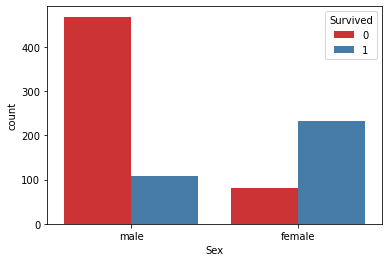

In [5]:
#
sns.countplot(x='Sex', hue = 'Survived', data = dt,
palette = 'Set1')

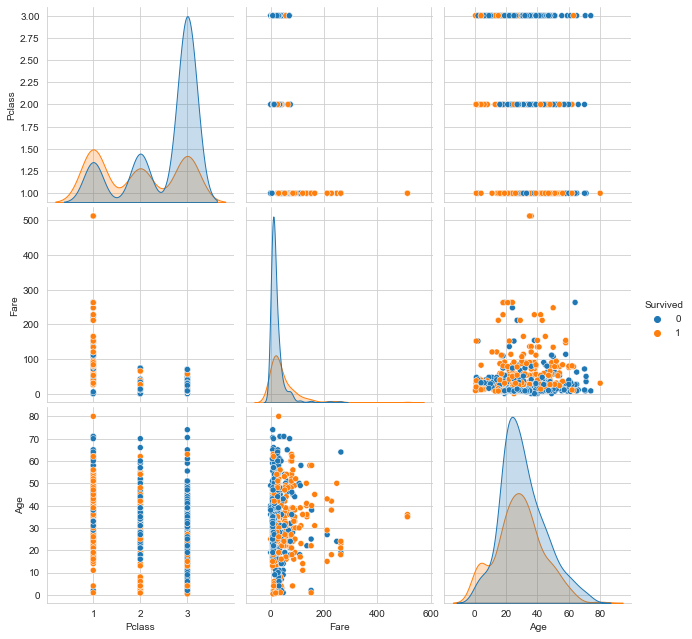

In [6]:
sns.set_style("whitegrid");
sns.pairplot(dt[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

Above graph is a bi-variaent analysis which is not much informative.

<AxesSubplot:xlabel='Age', ylabel='Density'>

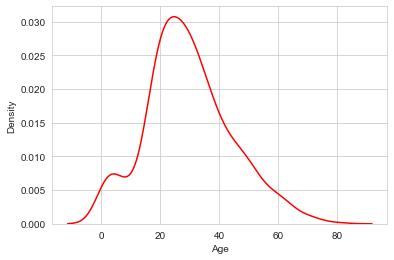

In [7]:
#A Kernel Density Estimate (KDE) Plot is used to plot the distribution of continuous data.
sns.kdeplot(x = 'Age' , data = dt , color = 'r')

from the above graph we can conclude that most of the passangers were between 20 and 40

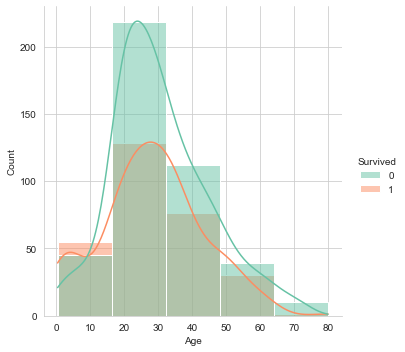

In [8]:
sns.displot(x ='Age',kde=True,bins = 5 ,
hue = dt['Survived'] , palette = 'Set2', data=dt)

from the above graph we can again conclude that most of the passangers were between 20 and 40

In [16]:
dt["Survived"]=dt["Survived"]
dt["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

here, 0 means died
      1 means survived

In [17]:
dt.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bowen, Mr. David John ""Dai""",male,1601,B96 B98,S
freq,1,577,7,4,644


In [18]:
dt.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [19]:
#counting the percentages of the missing values and number of missing values.
total = dt.isnull().sum().sort_values(ascending=False)
percent_1 = dt.isnull().sum()/dt.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.10
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00


here the Embarked column has only two missing value that can be filled up. We need to do some more with Age column and column Cabin have to be dropped since it has so many missing values.

In [20]:
data = [dt, dtest]

for dataset in data:
    mean = dt["Age"].mean()
    std = dt["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dt["Age"].astype(int)
dt["Age"].isnull().sum()

0

# data processing

We have to remove the column passengerid and cabin since it doesn't playing any role in prediction

In [78]:
train_df = dt.drop(['PassengerId','Cabin','Name','Ticket','Embarked'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000
887,1,1,female,19,0,0,30.0000
888,0,3,female,21,1,2,23.4500
889,1,1,male,26,0,0,30.0000


here we have to make the Sex column as numeric to perform trainning and we can know the gender too.

In [79]:
train_df.Sex=train_df.Sex.map({'male':1,'female':2})
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,7.2500
1,1,1,2,38,1,0,71.2833
2,1,3,2,26,0,0,7.9250
3,1,1,2,35,1,0,53.1000
4,0,3,1,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000
887,1,1,2,19,0,0,30.0000
888,0,3,2,21,1,2,23.4500
889,1,1,1,26,0,0,30.0000


Now we have to take Survived as output. Therfore we have to drop it from the table and store it in another variable.
As i took here it in output variable.

In [80]:
output=train_df.Survived
train_df=train_df.drop('Survived',axis='columns')
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22,1,0,7.2500
1,1,2,38,1,0,71.2833
2,3,2,26,0,0,7.9250
3,1,2,35,1,0,53.1000
4,3,1,35,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000
887,1,2,19,0,0,30.0000
888,3,2,21,1,2,23.4500
889,1,1,26,0,0,30.0000


# Above data processing has to be done with test data set too.

First of all we have to drpo the column which are not in use.

In [87]:
dtest = dtest.drop(['PassengerId','Cabin','Name','Ticket','Embarked'], axis=1)
dtest

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22,0,0,7.8292
1,3,female,38,1,0,7.0000
2,2,male,26,0,0,9.6875
3,3,male,35,0,0,8.6625
4,3,female,35,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,32,0,0,8.0500
414,1,female,44,0,0,108.9000
415,3,male,37,0,0,7.2500
416,3,male,34,0,0,8.0500


In [88]:
dtest.Sex=dtest.Sex.map({'male':1,'female':2})
dtest

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22,0,0,7.8292
1,3,2,38,1,0,7.0000
2,2,1,26,0,0,9.6875
3,3,1,35,0,0,8.6625
4,3,2,35,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,32,0,0,8.0500
414,1,2,44,0,0,108.9000
415,3,1,37,0,0,7.2500
416,3,1,34,0,0,8.0500


In [108]:
dtest.Fare.isnull().sum()

1

her there is a null value in Fare so we have to fill it with an int or float value.

In [112]:
data = [dt, dtest]

for dataset in data:
    mean = dtest["Fare"].mean()
    std = dtest["Fare"].std()
    is_null = dataset["Fare"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Fare"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Fare"] = age_slice
    dataset["Fare"] = dtest["Fare"].astype(float)
dtest["Fare"].isnull().sum()

0

# Now it is time to train the model.

for checking the efficiency we have to split the training dataset.

In [113]:
#we have splitted the dataset into 80% for training and 20% for testing
x_train, x_test, y_train, y_test=train_test_split(train_df,output,test_size=0.2)

In [114]:
dist=DecisionTreeClassifier()
dist.fit(train_df,output)

DecisionTreeClassifier()

In [115]:
dist.score(x_test,y_test)

0.9720670391061452

here owr accuracy is 98%

In [116]:
dist.predict(dtest)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

Thankyou!!!